
# Project: TMDb Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> TMDb - The Movies Database provides data about the plot, cast and crew, budget, and revenues of several thousand films.


In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [94]:
# Loading the data and viewing the head.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

##### Analysing the above result set:
>1. There are 10866 rows and 21 columns in total.
>2. The column names are all in lowercase and with underscores, so these dont need to be changed.
>3. The datatypes for all columns are accurate, except for release_date which needs to be changed to date format.
>4. The Nulls need to be handled.
>5. There are a few columns that are not required for analysis, that can be deleted.


In [96]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Analysing the above result set:
> 1. Around 50% of the values in budget,revenue,budget_adj,revenue_adj appear to be Zeros.
> 2. In popularity column 75% of the values are below 1 and the max value is 32. This needs to be checked.
> 3. Runtime varies between 0 to 900. So, there might be short documentaries and also series included.
> 4. The vote_count ranges between 10 and 9767.
> 5. The vote_average ranges between 1.5 and 9.2.
> 6. The database contains movies released between 1960 and 2015.

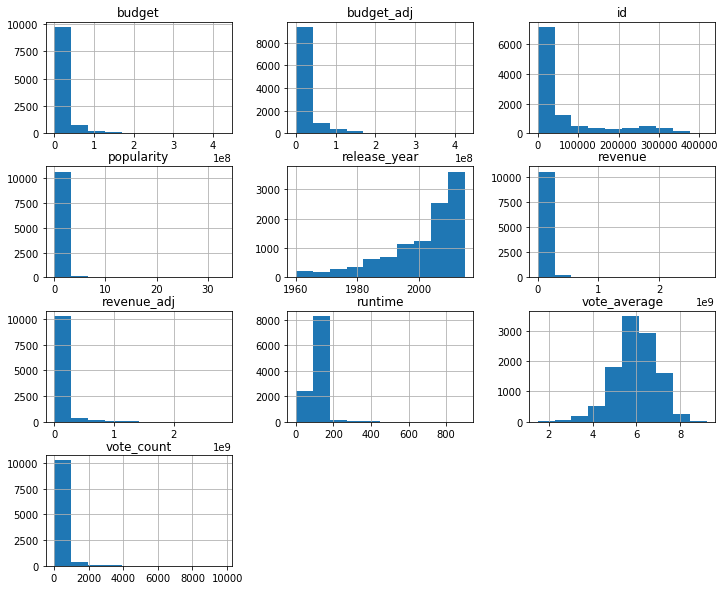

In [97]:
df.hist(figsize=(12,10));

##### From the histogram, we can derive the following:
> 1. The number of  movies being released in a year, has increased exponentially in the last 50 years.
> 2. Most of the movies have a runtime ranging between 100 to 200.
> 3. The vote_average tends to be left skewed, which is a good sign, as it implies that most of the movies have a score above 5.
> 4. Vote_count shows that a lot of movies have votes, below 100.


### Data Cleaning

> 1. Dropping the columns that are not required for analysis

In [98]:
df.drop(['id','imdb_id','homepage','tagline','overview'],axis=1,inplace=True)

In [99]:
# checking if the columns have beeen dropped.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


> 2. Looking for nulls in columns- cast, director, keywords, genres, production_companies- and removing them.

In [100]:
# Checking if there are specific reasons for Cast to be null. 
df[df.cast.isnull()].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,76.000000,7.600000e+01,7.600000e+01,76.000000,76.000000,76.000000,76.000000,7.600000e+01,7.600000e+01
mean,0.149994,2.941621e+05,4.672654e+05,63.026316,29.013158,6.884211,2005.934211,3.650807e+05,4.502022e+05
std,0.155772,1.071113e+06,3.832449e+06,53.758962,25.644489,0.893391,11.682848,1.315753e+06,3.640414e+06
min,0.001662,0.000000e+00,0.000000e+00,2.000000,10.000000,4.700000,1967.000000,0.000000e+00,0.000000e+00
25%,0.031777,0.000000e+00,0.000000e+00,7.750000,12.000000,6.475000,2005.750000,0.000000e+00,0.000000e+00
50%,0.088212,0.000000e+00,0.000000e+00,74.500000,18.500000,6.950000,2011.000000,0.000000e+00,0.000000e+00
75%,0.211834,0.000000e+00,0.000000e+00,93.250000,37.250000,7.525000,2014.000000,0.000000e+00,0.000000e+00
max,0.664023,7.000000e+06,3.340000e+07,360.000000,154.000000,8.900000,2015.000000,7.361680e+06,3.172146e+07


In [101]:
# Checking if there are specific reasons for Director to be null. 
df[df.director.isnull()].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,44.000000,4.400000e+01,4.400000e+01,44.000000,44.000000,44.000000,44.000000,4.400000e+01,4.400000e+01
mean,0.133886,2.859091e+05,2.500000e+05,87.681818,17.659091,6.836364,2007.954545,2.807973e+05,2.531967e+05
std,0.109210,1.072496e+06,1.658312e+06,93.719962,8.928510,0.906845,9.019242,1.048672e+06,1.679517e+06
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,4.900000,1967.000000,0.000000e+00,0.000000e+00
25%,0.047070,0.000000e+00,0.000000e+00,50.000000,11.000000,6.075000,2008.000000,0.000000e+00,0.000000e+00
50%,0.119373,0.000000e+00,0.000000e+00,65.500000,14.000000,6.800000,2010.000000,0.000000e+00,0.000000e+00
75%,0.179587,0.000000e+00,0.000000e+00,95.250000,19.250000,7.525000,2013.000000,0.000000e+00,0.000000e+00
max,0.443952,5.000000e+06,1.100000e+07,561.000000,42.000000,8.600000,2015.000000,4.680167e+06,1.114065e+07


In [102]:
# Checking if there are specific reasons for keywords to be null. 
df[df.keywords.isnull()].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1493.000000,1.493000e+03,1.493000e+03,1493.000000,1493.000000,1493.000000,1493.000000,1.493000e+03,1.493000e+03
mean,0.284177,3.229135e+06,3.726347e+06,95.421969,37.348292,5.780241,2006.766242,3.544152e+06,4.237385e+06
std,0.259281,1.150243e+07,2.359787e+07,44.100529,80.465481,1.044732,9.363934,1.255165e+07,2.552943e+07
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,2.400000,1960.000000,0.000000e+00,0.000000e+00
25%,0.123497,0.000000e+00,0.000000e+00,86.000000,12.000000,5.100000,2004.000000,0.000000e+00,0.000000e+00
50%,0.227352,0.000000e+00,0.000000e+00,93.000000,17.000000,5.800000,2010.000000,0.000000e+00,0.000000e+00
75%,0.375427,0.000000e+00,0.000000e+00,104.000000,31.000000,6.500000,2013.000000,0.000000e+00,0.000000e+00
max,2.511394,1.450000e+08,4.319711e+08,877.000000,1361.000000,8.600000,2015.000000,1.697166e+08,5.236619e+08


In [103]:
# Checking if there are specific reasons for genres to be null. 
df[df.genres.isnull()].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,23.000000,23.000000,23.0,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,0.167966,217.391304,0.0,70.652174,17.521739,6.421739,2004.652174,1220.949640,0.0
std,0.126428,1042.572070,0.0,52.115788,11.746835,1.231760,12.470360,5855.468772,0.0
min,0.020701,0.000000,0.0,0.000000,10.000000,3.000000,1970.000000,0.000000,0.0
25%,0.075151,0.000000,0.0,28.000000,11.000000,5.850000,2000.500000,0.000000,0.0
50%,0.130018,0.000000,0.0,76.000000,12.000000,6.700000,2010.000000,0.000000,0.0
75%,0.246796,0.000000,0.0,100.000000,18.500000,7.100000,2012.500000,0.000000,0.0
max,0.520520,5000.000000,0.0,220.000000,57.000000,8.500000,2015.000000,28081.841720,0.0


In [104]:
# Checking if there are specific reasons for production_companies to be null. 
df[df.production_companies.isnull()].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1030.000000,1.030000e+03,1.030000e+03,1030.000000,1030.000000,1030.00000,1030.000000,1.030000e+03,1.030000e+03
mean,0.215569,7.389435e+05,4.668284e+05,96.291262,20.928155,6.04165,2005.296117,8.922093e+05,5.730185e+05
std,0.362314,3.089505e+06,3.813521e+06,52.433035,17.555318,1.10518,9.610626,4.299264e+06,4.495947e+06
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,2.10000,1961.000000,0.000000e+00,0.000000e+00
25%,0.081834,0.000000e+00,0.000000e+00,85.000000,12.000000,5.40000,2002.000000,0.000000e+00,0.000000e+00
50%,0.168544,0.000000e+00,0.000000e+00,92.000000,15.000000,6.10000,2008.000000,0.000000e+00,0.000000e+00
75%,0.276756,0.000000e+00,0.000000e+00,104.000000,23.000000,6.80000,2012.000000,0.000000e+00,0.000000e+00
max,8.411577,3.500000e+07,7.600000e+07,900.000000,222.000000,9.20000,2015.000000,8.393668e+07,7.697178e+07


##### The Nulls seems to be exsisting across all levels of popularity, across a range of vote_count, for various release_year etc. So i will be deleting them.

In [105]:
# Deleting rows with nulls from the below 3 columns.
df.dropna(subset=['cast','director','genres'],inplace=True)

In [106]:
#replacing nulls with NA in the columns keywords and production_companies, 
#because, currently i dont know if i will be requiring these columns for my analysis in future.
# i dont want to drop a few hundred rows because of columns that im not sure are required.
# so, i will currently fill them with NA
df.fillna({'keywords':'NA','production_companies':'NA'},inplace=True)

In [107]:
#verifying if all the nulls have been handled
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10732 non-null float64
budget                  10732 non-null int64
revenue                 10732 non-null int64
original_title          10732 non-null object
cast                    10732 non-null object
director                10732 non-null object
keywords                10732 non-null object
runtime                 10732 non-null int64
genres                  10732 non-null object
production_companies    10732 non-null object
release_date            10732 non-null object
vote_count              10732 non-null int64
vote_average            10732 non-null float64
release_year            10732 non-null int64
budget_adj              10732 non-null float64
revenue_adj             10732 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.4+ MB


##### Currently there are 10732 rows of non null values. Now, i need to analyse the cause (if any) for the missing values in budget and revenue columns

In [108]:
df.query('budget == 0').describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5578.000000,5578.0,5.578000e+03,5578.000000,5578.000000,5578.000000,5578.000000,5578.0,5.578000e+03
mean,0.336389,0.0,3.172016e+06,98.125134,44.278415,5.902886,2001.268734,0.0,5.355952e+06
std,0.314327,0.0,1.429964e+07,35.692390,70.384014,0.968070,13.722095,0.0,2.480992e+07
min,0.000188,0.0,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.0,0.000000e+00
25%,0.150044,0.0,0.000000e+00,88.000000,14.000000,5.300000,1994.000000,0.0,0.000000e+00
50%,0.267911,0.0,0.000000e+00,95.000000,21.000000,6.000000,2007.000000,0.0,0.000000e+00
75%,0.433112,0.0,0.000000e+00,106.000000,44.000000,6.600000,2012.000000,0.0,0.000000e+00
max,8.411577,0.0,2.536254e+08,900.000000,1329.000000,9.200000,2015.000000,0.0,4.559735e+08


In [109]:
# Looks like budget values are missing across genres.
df.query('budget_adj == 0').groupby('genres').count().head(5)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,,,,,,
Action,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
Action|Adventure,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Action|Adventure|Animation,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Action|Adventure|Animation|Comedy|Drama,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Action|Adventure|Animation|Comedy|Family,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [110]:
# Looks like budget values are missing for almost all years.
df.query('budget_adj == 0').groupby('release_year').count().head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,,,,,,,
1960,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
1961,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
1962,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
1963,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
1964,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31


In [111]:
# Looks like budget values are missing for almost all years.
df.query('budget_adj == 0').groupby('production_companies').count().sort_values('popularity',ascending=False)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
production_companies,,,,,,,,,,,,,,,
NA,827,827,827,827,827,827,827,827,827,827,827,827,827,827,827
Paramount Pictures,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
Universal Pictures,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
Warner Bros.,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
Walt Disney Pictures,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
Metro-Goldwyn-Mayer (MGM),35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
TriStar Pictures,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
Columbia Pictures,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
Twentieth Century Fox Film Corporation,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23


##### The budget values appear to be missing for no visible reason. they are missing across years, genres, directors etc.

In [112]:
df[df.revenue != 0].describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4844.000000,4.844000e+03,4.844000e+03,4844.000000,4844.000000,4844.000000,4844.000000,4.844000e+03,4.844000e+03
mean,1.046223,2.960381e+07,8.932157e+07,107.966350,436.726879,6.148823,2000.916391,3.520150e+07,1.152105e+08
std,1.357097,4.052688e+07,1.621428e+08,21.106494,806.784413,0.798362,11.571458,4.376863e+07,1.989286e+08
min,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,0.388322,1.700000e+06,7.769608e+06,95.000000,47.000000,5.600000,1994.000000,2.337415e+06,1.047632e+07
50%,0.680791,1.500000e+07,3.190530e+07,104.000000,147.000000,6.200000,2004.000000,2.032801e+07,4.402312e+07
75%,1.210532,4.000000e+07,1.000000e+08,117.000000,435.250000,6.700000,2010.000000,4.973737e+07,1.317125e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


##### Even the revenue values are missing for no concievable reason.

> 3. Extracting month from release_date and renaming the column to release_month. As i just need month for my analysis 

In [113]:
df.release_date=pd.DatetimeIndex(df.release_date).month

In [114]:
df.rename(columns={'release_date':'release_month'},inplace=True)

In [115]:
#checking , if the changes took place.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10732 non-null float64
budget                  10732 non-null int64
revenue                 10732 non-null int64
original_title          10732 non-null object
cast                    10732 non-null object
director                10732 non-null object
keywords                10732 non-null object
runtime                 10732 non-null int64
genres                  10732 non-null object
production_companies    10732 non-null object
release_month           10732 non-null int64
vote_count              10732 non-null int64
vote_average            10732 non-null float64
release_year            10732 non-null int64
budget_adj              10732 non-null float64
revenue_adj             10732 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


In [116]:
mean_rating= df.vote_average.mean()

In [117]:
#creating a function that masks each movie as good or bad based on vote average. 

def good_or_bad(row):
    return row.vote_average > mean_rating

In [118]:
df['worth_watching'] = df.apply(lambda row: good_or_bad(row), axis=1)

In [119]:
good = df.worth_watching == True
bad  = df.worth_watching == False

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How does good or bad rated movies depend on its runtime, release month or genres?)

> 1. Analysing the dependency between Runtime and Ratings.

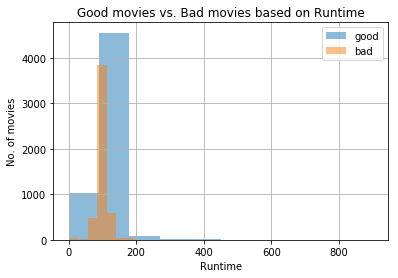

In [120]:
df.runtime[good].hist(label='good',alpha=0.5,bins=10)
df.runtime[bad].hist(label='bad',alpha=0.5,bins=10)
plt.title('Good movies vs. Bad movies based on Runtime')
plt.xlabel('Runtime')
plt.ylabel('No. of movies')
plt.legend();

##### The graph shows that there is a good chance of a movie with runtimes around 110 to 180 mins to be good.

In [121]:
# Checking the ratio of good movies to bad movies.
df.worth_watching.value_counts()

True     5699
False    5033
Name: worth_watching, dtype: int64

##### The good movies are just 0.5 % more than the bad movies (5699:5033). 

> 2. Analysing the dependency between Release month and Ratings.

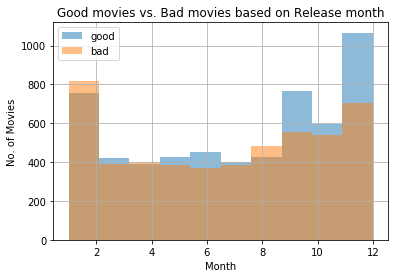

In [122]:
df.release_month[good].hist(label='good',alpha=0.5,bins=10)
df.release_month[bad].hist(label='bad',alpha=0.5,bins=10)
plt.title('Good movies vs. Bad movies based on Release month')
plt.xlabel('Month')
plt.ylabel('No. of Movies')
plt.legend();

##### There is a good chance of movies releasing around year end to be good.

> 3. Analysing the dependency between Genres and Ratings.

In [123]:
genre = df['genres'].str.split('|',expand=True).stack()
indx = genre.index.get_level_values(0)
genre_df = df.loc[indx].copy()
genre_df['genres'] = genre.values

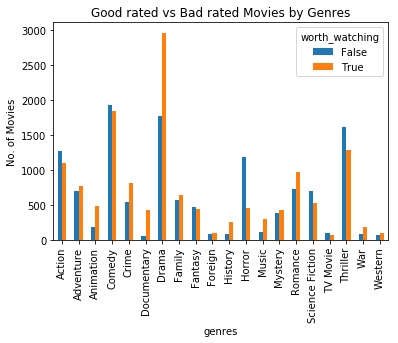

In [124]:
genre_df.groupby(['genres','worth_watching'])['popularity'].count().unstack().plot(kind='bar')
plt.ylabel('No. of Movies')
plt.title('Good rated vs Bad rated Movies by Genres');

##### The above graph shows that genres like Drama,crime, Doumentary etc. have more good rated movies.

### Research question 2: Are movies with a good rating, commercially successful?

Beacause i want to check the commercial success of a movie, i will be using the budget_adj and revenue_adj columns. 
Since there is a lot of missing data in these columns, i will create a new dataframe, and delete the rows with zeros.

In [125]:
df_success= df.copy()

In [126]:
df_success = df_success[df_success.budget_adj != 0]
df_success = df_success[df_success.revenue_adj != 0]

In [127]:
# checking if the Zeros have been removed from both the columns
df_success.describe()

,popularity,budget,revenue,runtime,release_month,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3850.000000,3.850000e+03,3.850000e+03,3850.000000,3850.000000,3850.000000,3850.000000,3850.000000,3.850000e+03,3.850000e+03
mean,1.192778,3.724698e+07,1.077871e+08,109.212987,7.040519,528.278442,6.168390,2001.260519,4.428989e+07,1.371959e+08
std,1.475462,4.221167e+07,1.766030e+08,19.913488,3.364096,880.245090,0.794817,11.285056,4.480837e+07,2.161848e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,1.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463380,1.000000e+07,1.363273e+07,95.000000,4.000000,71.000000,5.700000,1995.000000,1.317218e+07,1.841498e+07
50%,0.798343,2.400000e+07,4.488472e+07,106.000000,7.000000,204.500000,6.200000,2004.000000,3.004524e+07,6.179073e+07
75%,1.372826,5.000000e+07,1.242969e+08,119.000000,10.000000,580.750000,6.700000,2010.000000,6.072867e+07,1.633775e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,12.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [128]:
def s_or_f(row):
    return row.revenue_adj-row.budget_adj > 1

In [129]:
df_success['success']= df_success.apply(lambda row: s_or_f(row),axis=1)

In [130]:
df_success.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_month,vote_count,vote_average,release_year,budget_adj,revenue_adj,worth_watching,success
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6,5562,6.5,2015,1.379999e+08,1.392446e+09,True,True
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5,6185,7.1,2015,1.379999e+08,3.481613e+08,True,True
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3,2480,6.3,2015,1.012000e+08,2.716190e+08,True,True
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12,5292,7.5,2015,1.839999e+08,1.902723e+09,True,True
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4,2947,7.3,2015,1.747999e+08,1.385749e+09,True,True


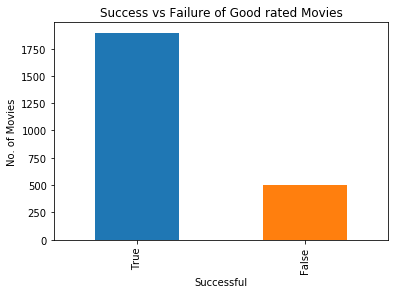

In [131]:
df_success[df_success.worth_watching== True].success.value_counts().plot(kind='bar')
plt.title('Success vs Failure of Good rated Movies')
plt.ylabel('No. of Movies')
plt.xlabel('Successful');

##### Of all the movies that had above average ratings, around 25% of the movies failed commercially. 

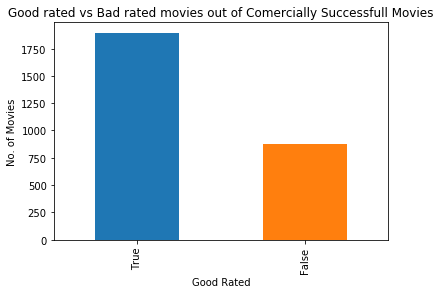

In [132]:
df_success[df_success.success== True].worth_watching.value_counts().plot(kind='bar')
plt.title('Good rated vs Bad rated movies out of Comercially Successfull Movies')
plt.ylabel('No. of Movies')
plt.xlabel('Good Rated');

##### Thats intresting! Around one third of the commercially successful movies have a below average rating.

<a id='conclusions'></a>
## Conclusions

> 1. There is a good chance of Movies with runtimes around 110 to 180 mins to be good(better than average rating).
> 2. There is a good chance of movies releasing around year end to be good.
> 3. Genres like Drama,crime, Doumentary, Romance have more good rated movies.
> 4. Out of the movies that had above average ratings, around 25% of the movies failed commercially.
> 5. Around one third of the commercially successful movies have a below average rating.

Please note that the above findings are not based on statistical explorations.

References: Stackoverflow.com

In [133]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0